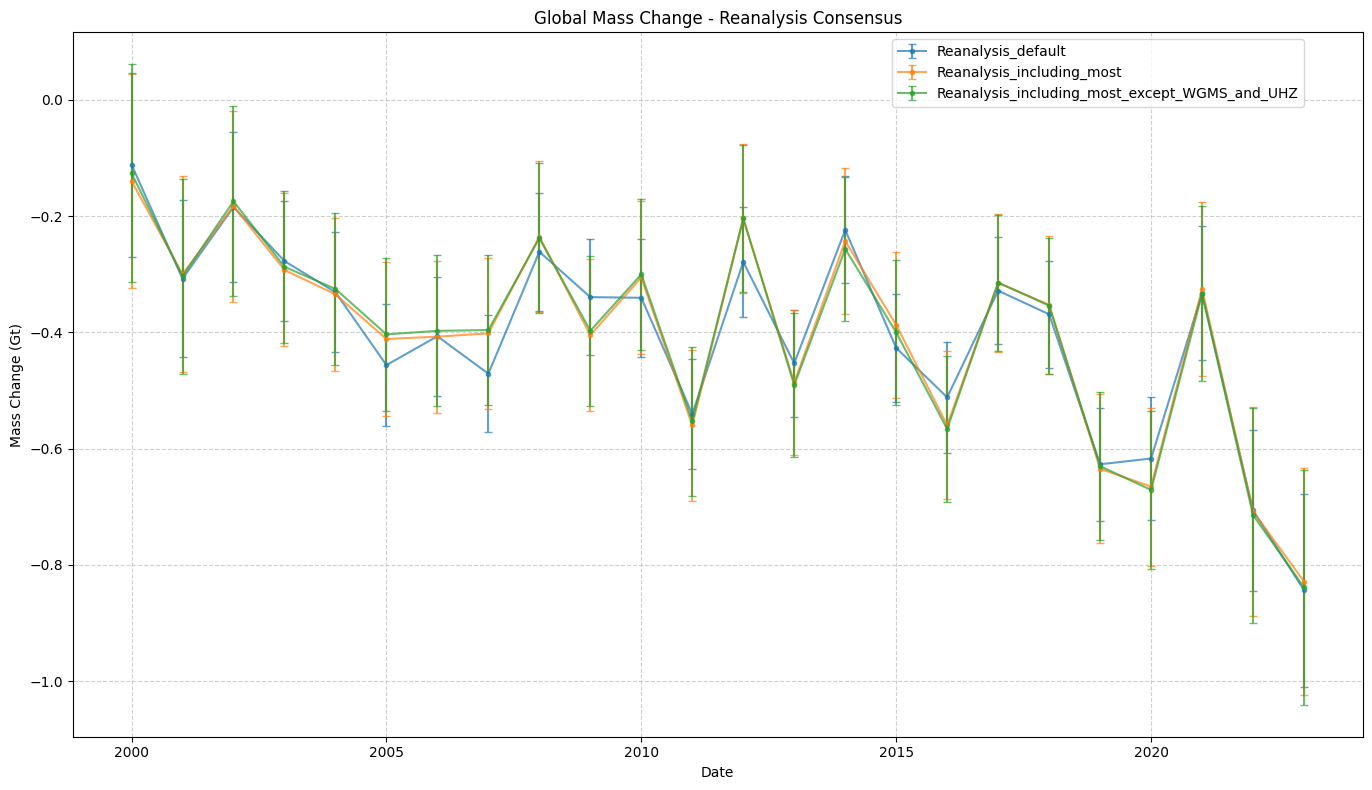

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths (relative to project root; run notebook with kernel cwd = project root)
input_dir = Path("input")
output_dir = Path("output")
input_sensitivity = input_dir / "sensitivity"

# Find global_mwe.csv files under input/sensitivity/Reanalysis*/0_*/consensus/csvs/
csv_files = sorted(input_sensitivity.glob("Reanalysis*/0_*/consensus/csvs/global_mwe.csv"))

plt.figure(figsize=(14, 8))

for csv_file in csv_files:
    try:
        # Read the CSV file
        df = pd.read_csv(str(csv_file))
        
        # Identify columns based on prompt description
        # Looking for 'dates' (or similar), 'changes', and 'errors'
        date_col = next((c for c in df.columns if 'date' in c.lower()), df.columns[0])
        change_col = next((c for c in df.columns if 'change' in c.lower()), None)
        error_col = next((c for c in df.columns if 'error' in c.lower()), None)
        
        if change_col and error_col:
            # Extract the Reanalysis folder name for the legend (Path.parts)
            path_parts = csv_file.parts
            label = next((part for part in path_parts if part.startswith('Reanalysis')), 'Unknown')
            
            # Plot with error bars
            plt.errorbar(df[date_col], df[change_col], yerr=df[error_col], 
                         label=label, fmt='.-', capsize=3, alpha=0.7)
        else:
            print(f"Columns not found in {csv_file}. Available: {df.columns}")

    except Exception as e:
        print(f"Could not process {csv_file!s}: {e}")

plt.title('Global Mass Change - Reanalysis Consensus')
plt.xlabel('Date')
plt.ylabel('Mass Change (Gt)')
plt.legend(bbox_to_anchor=(0.63, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Loop

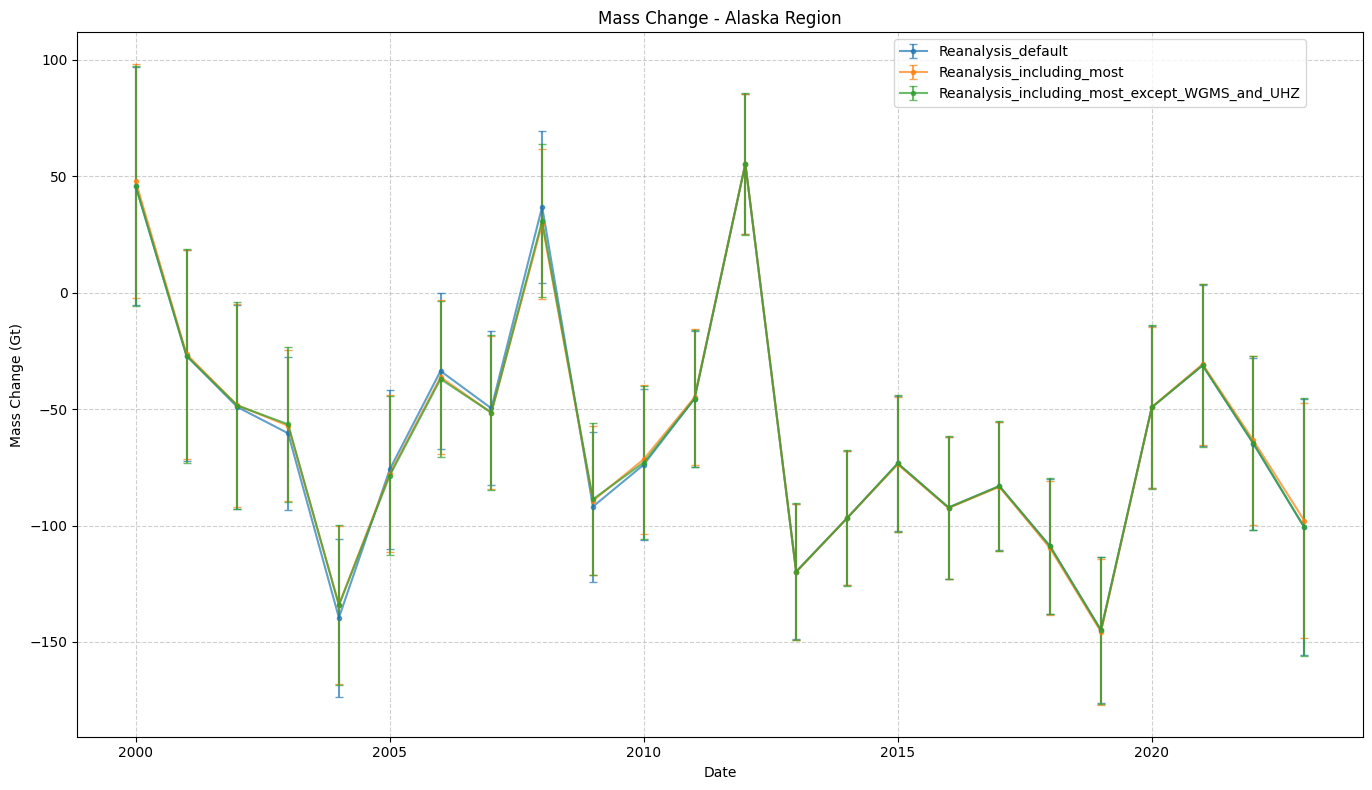

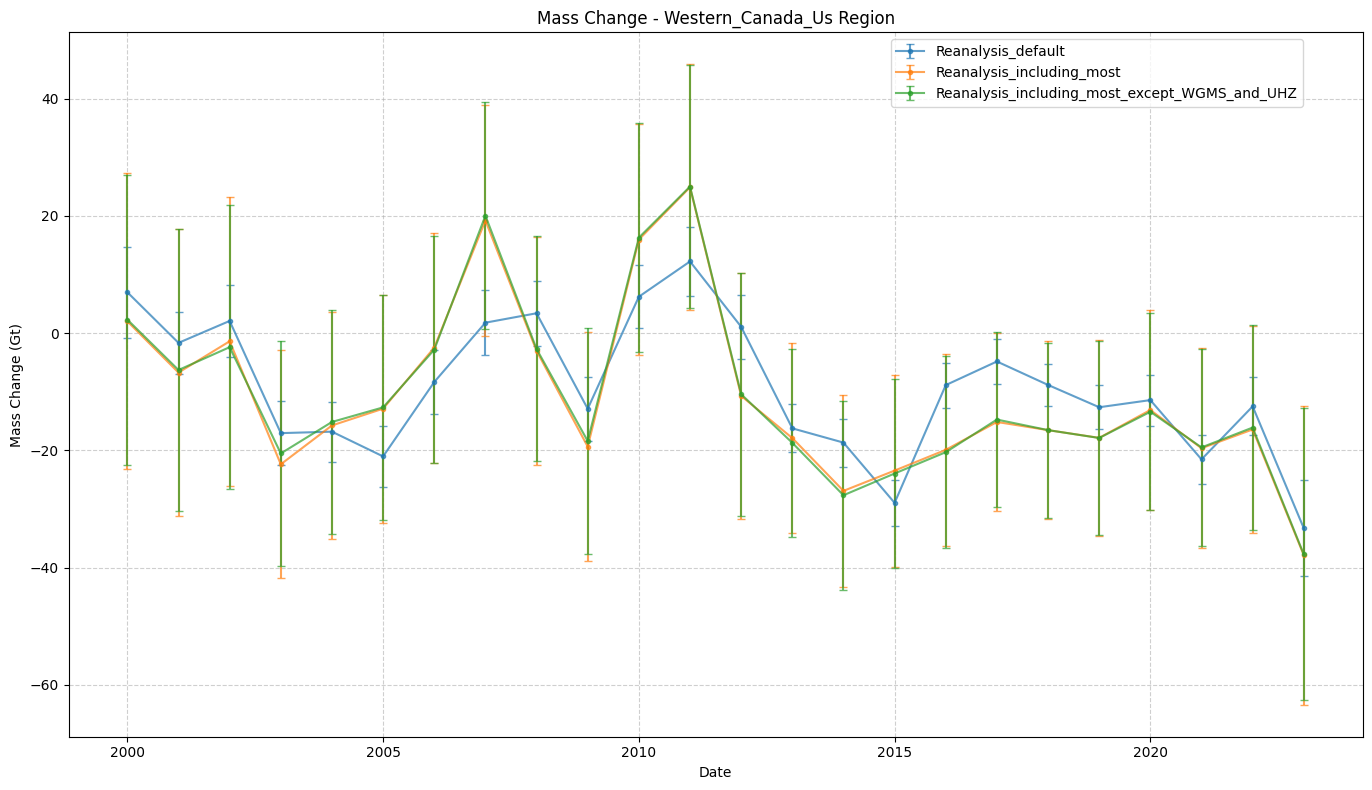

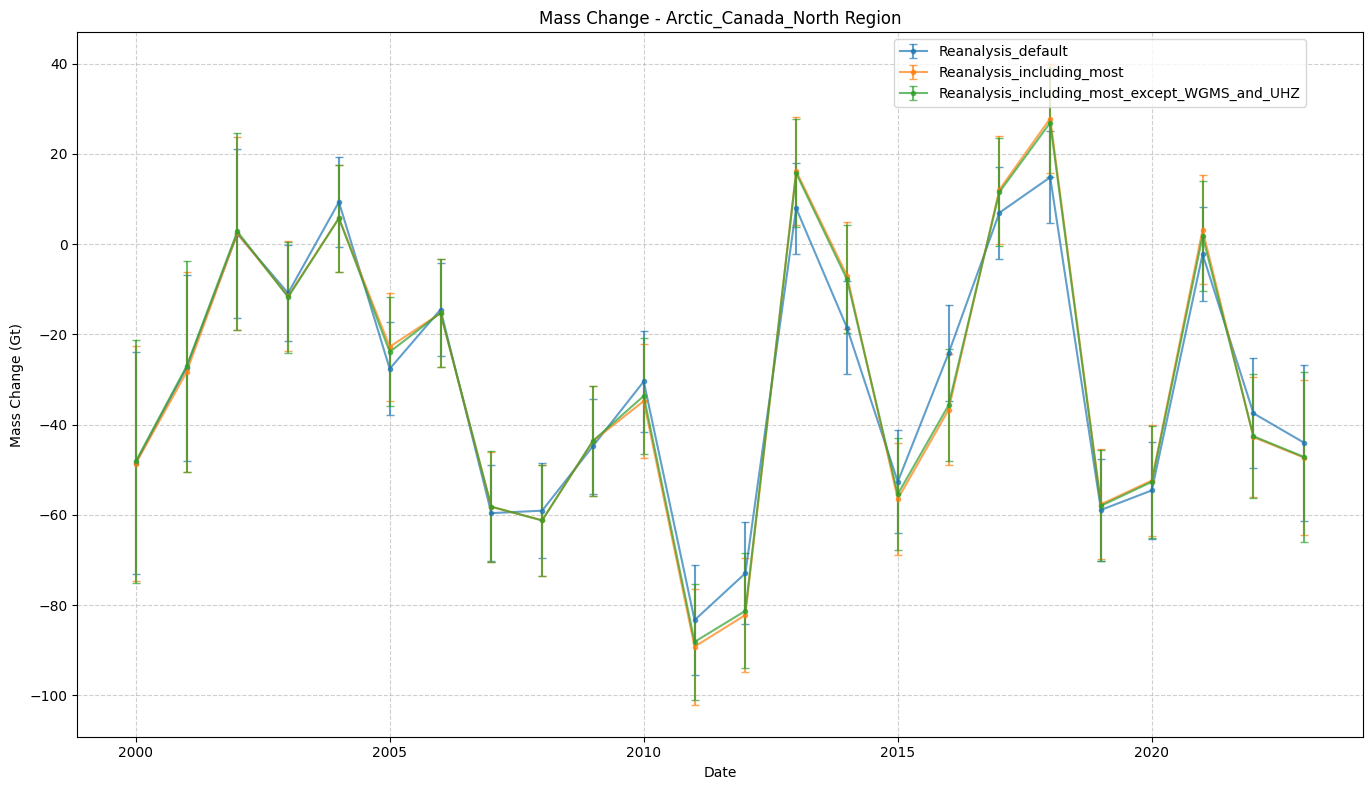

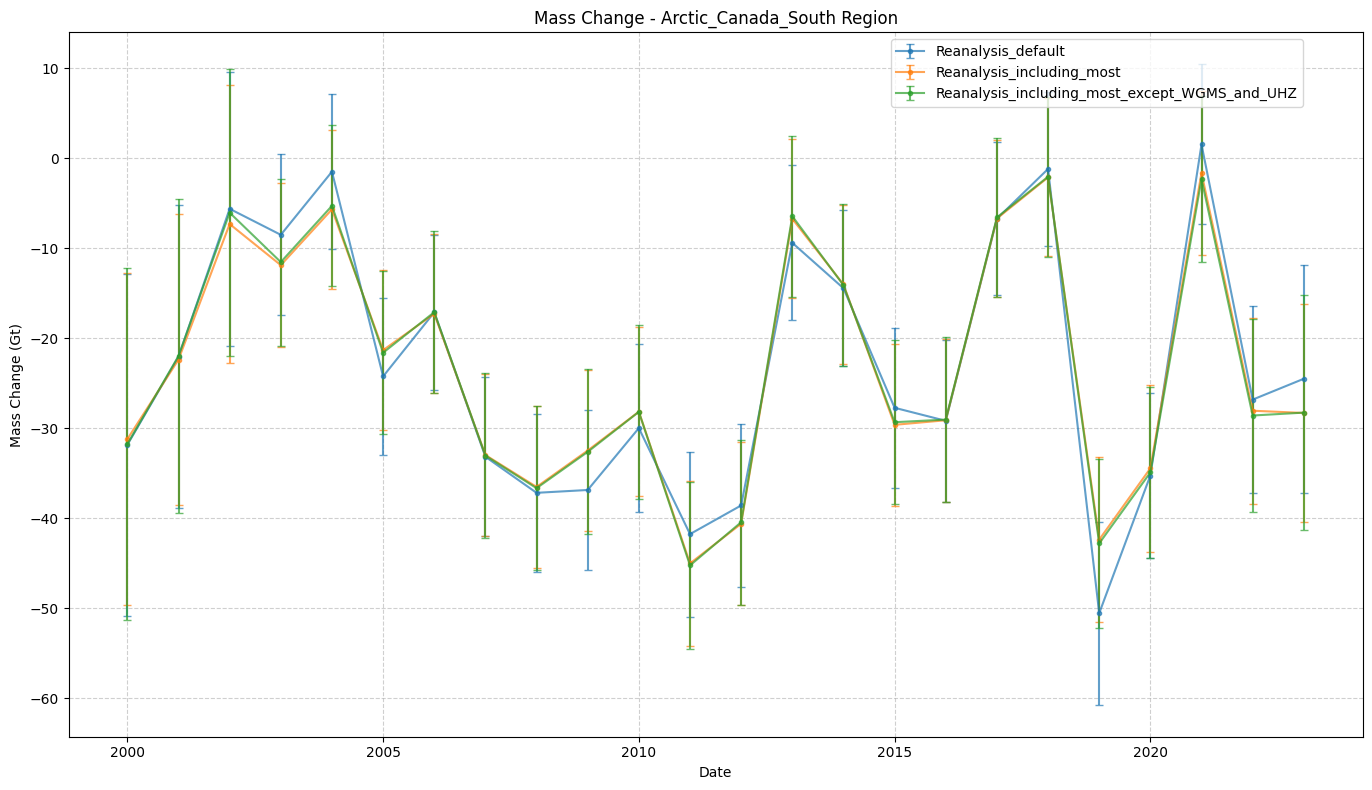

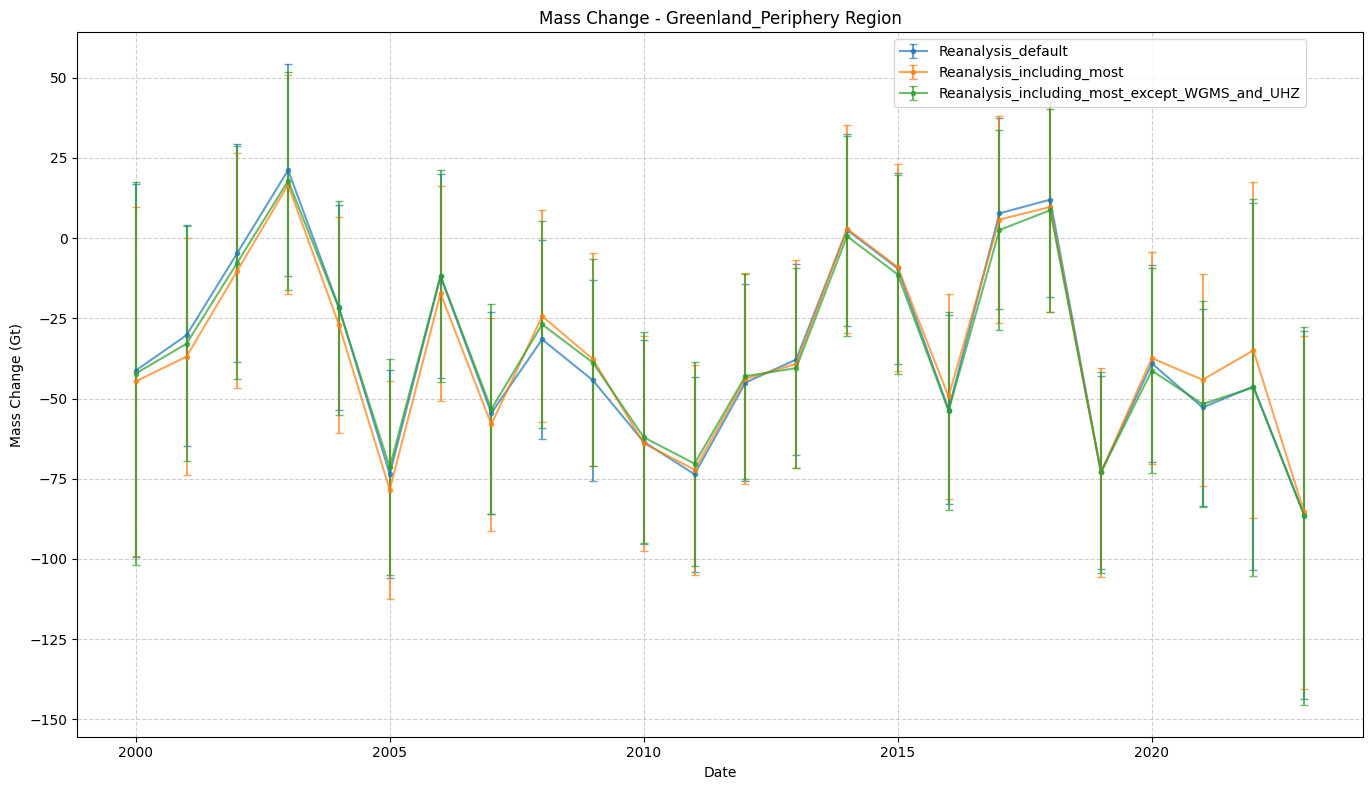

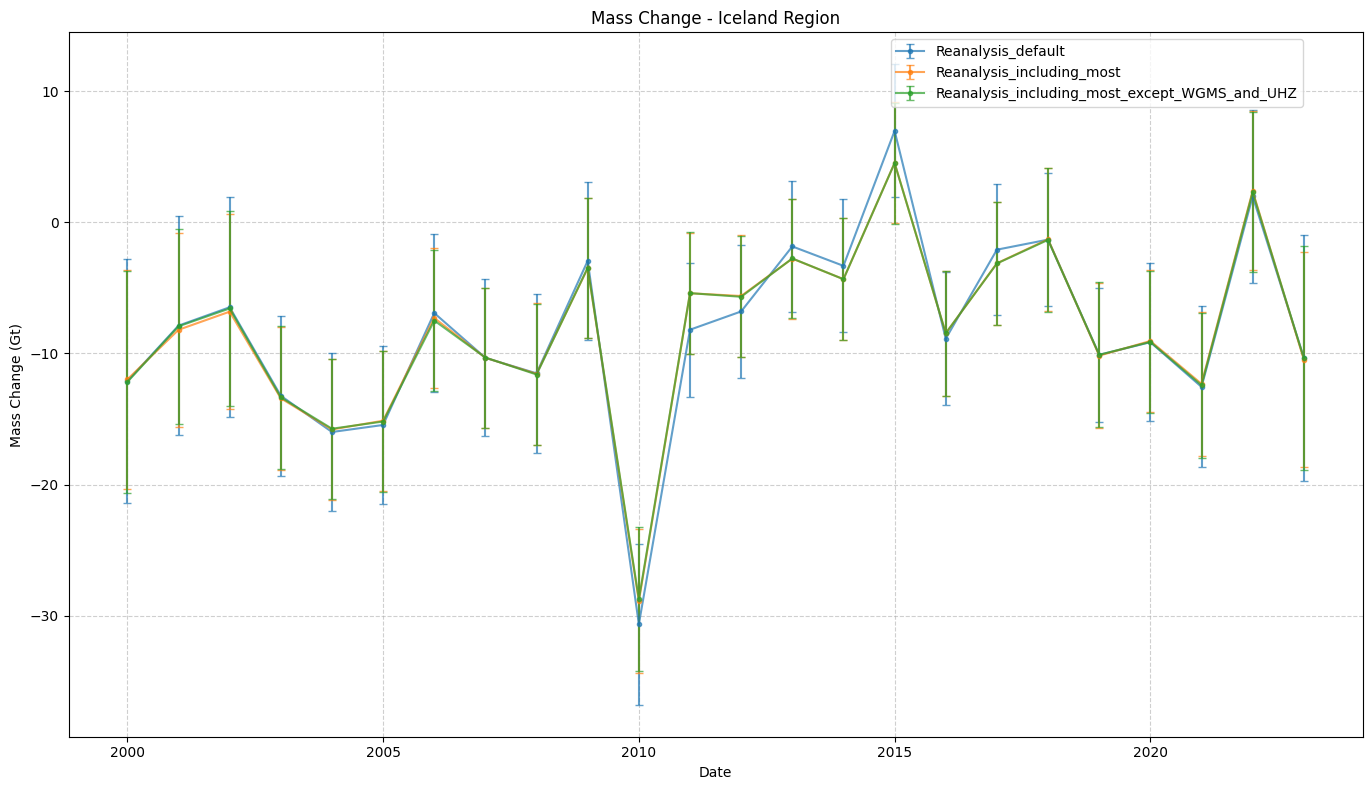

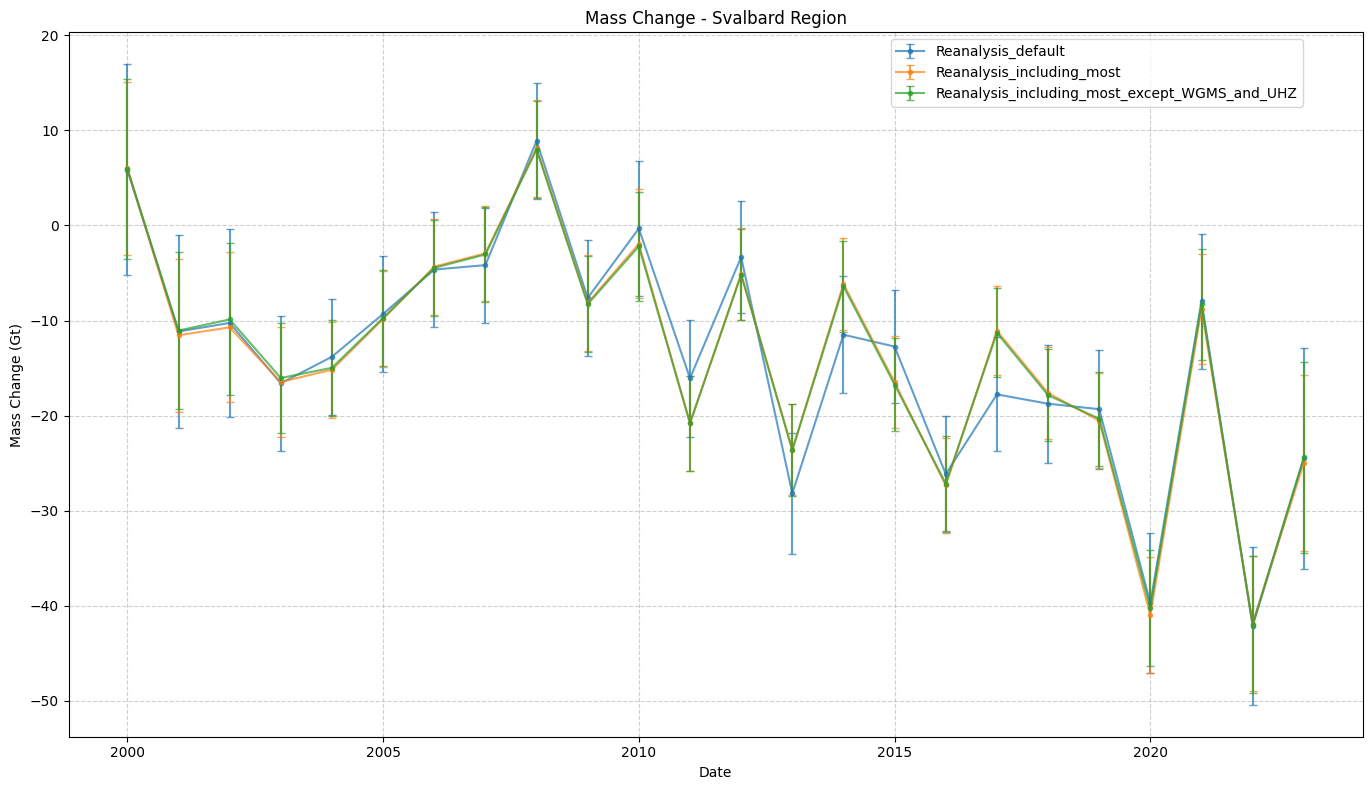

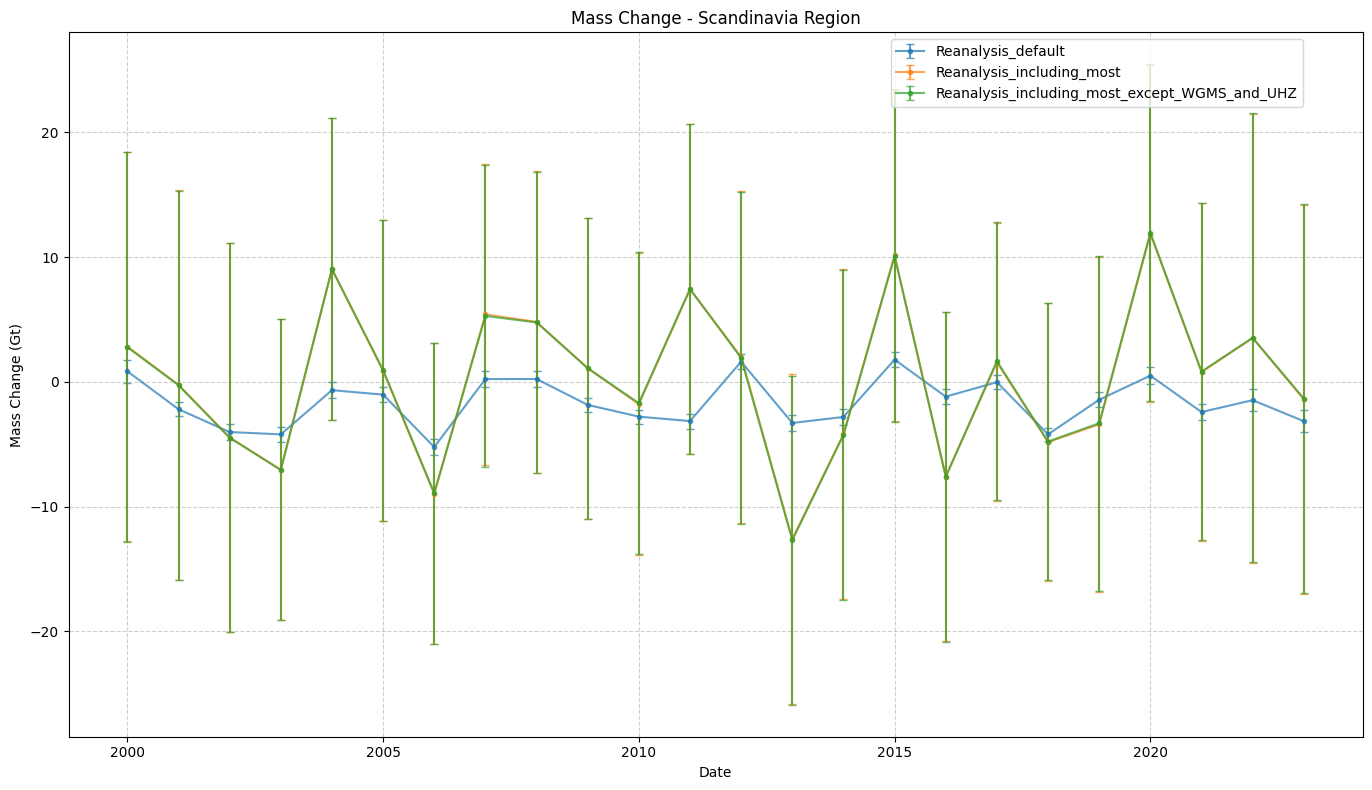

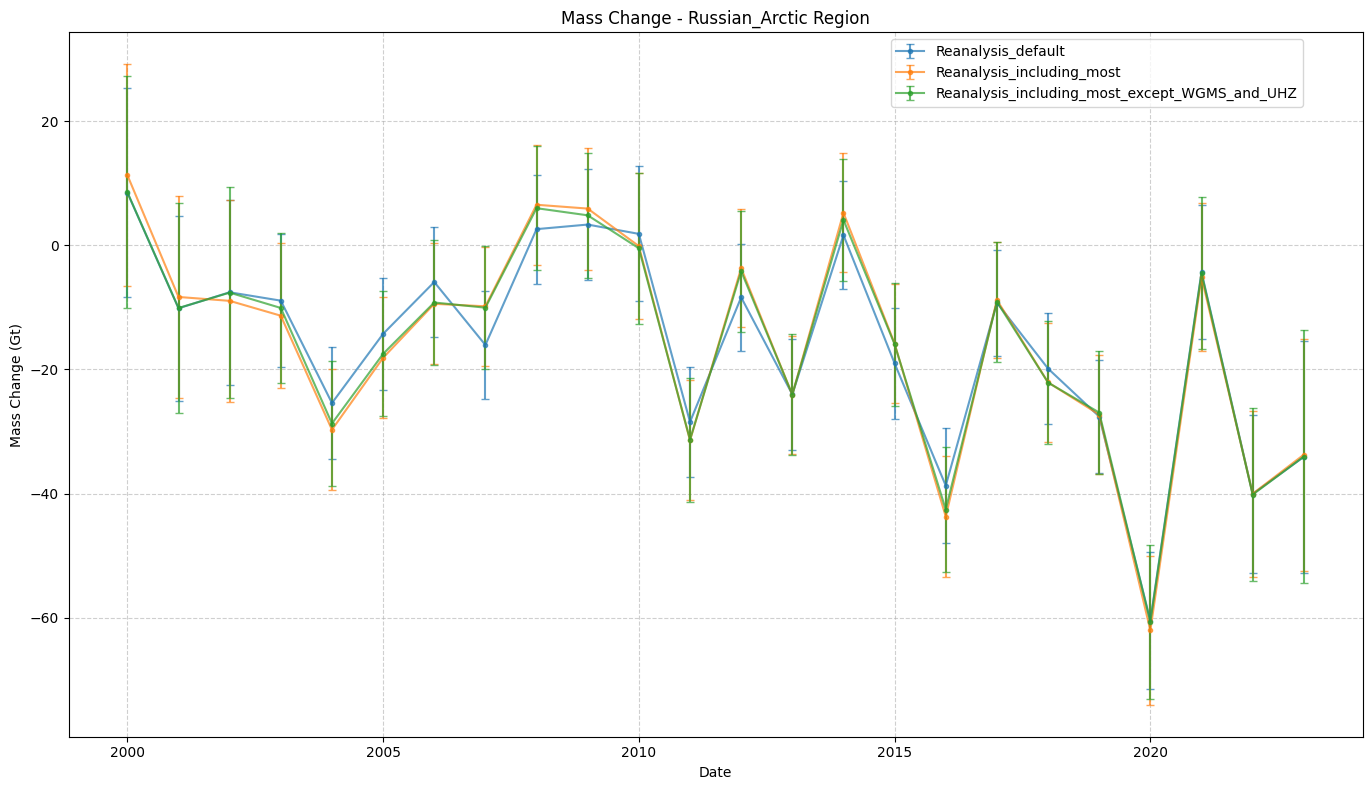

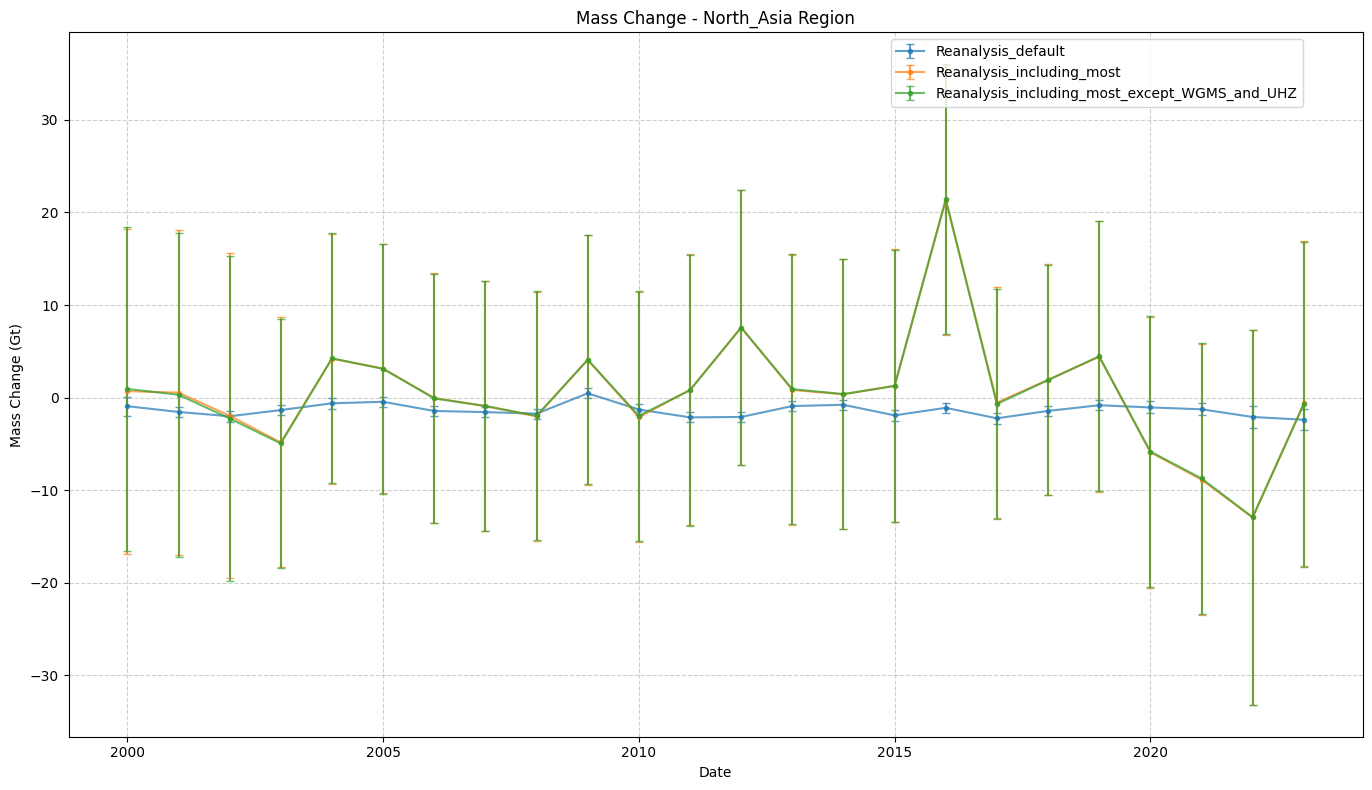

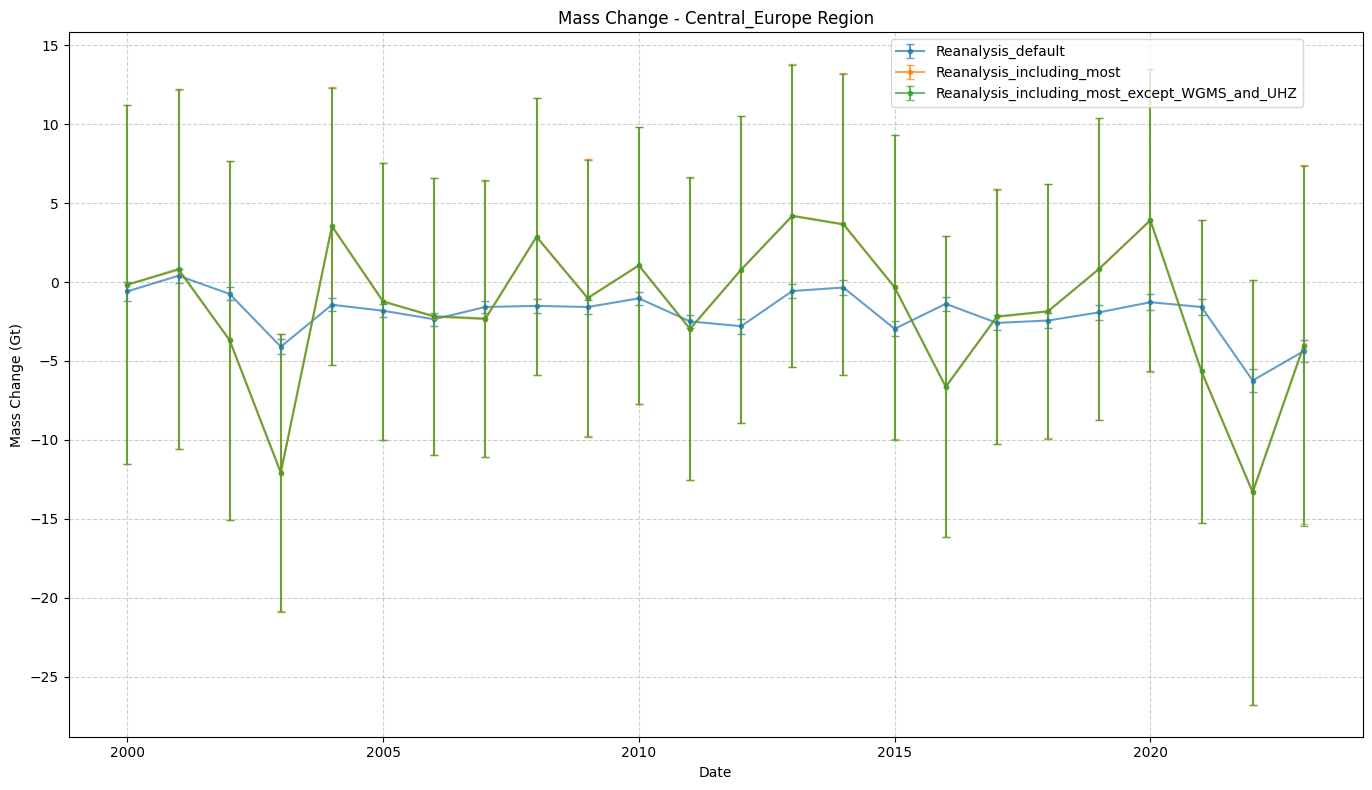

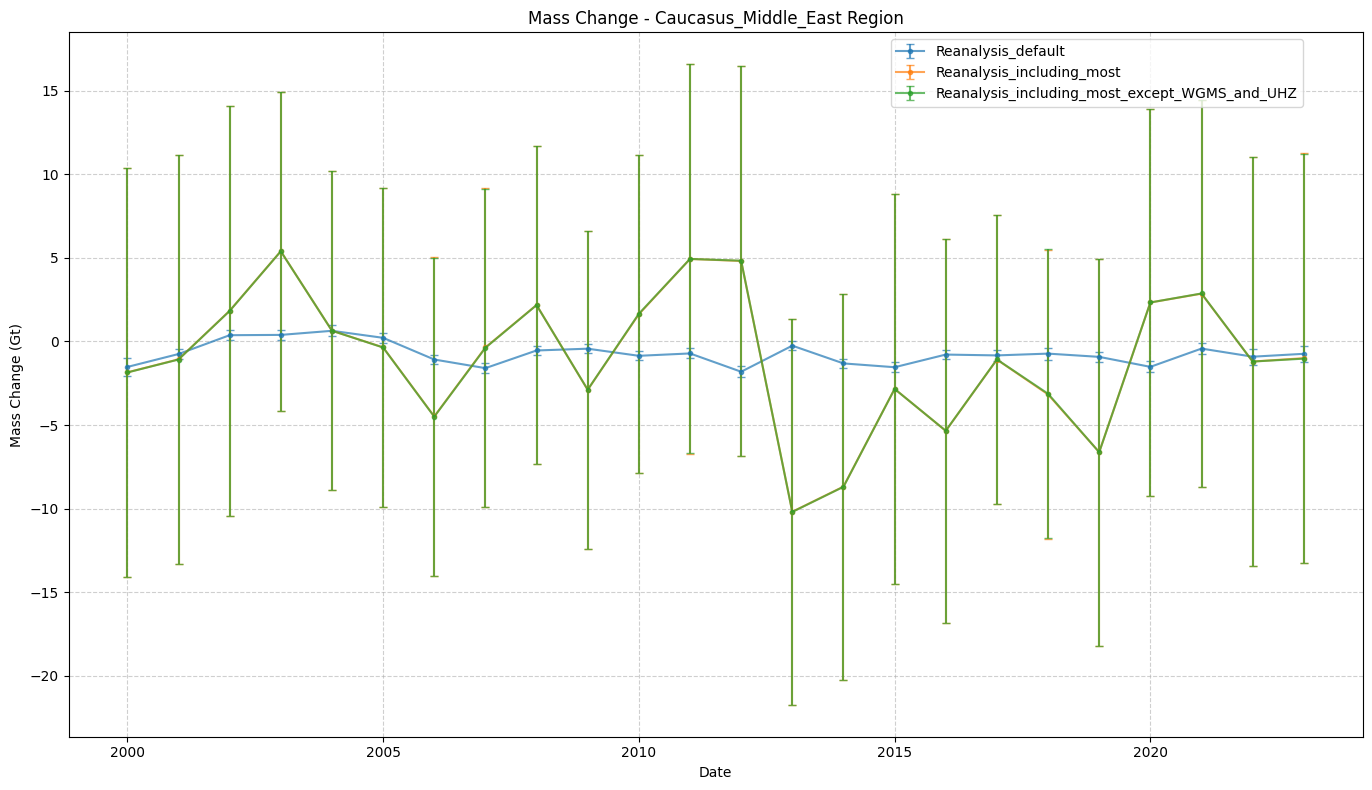

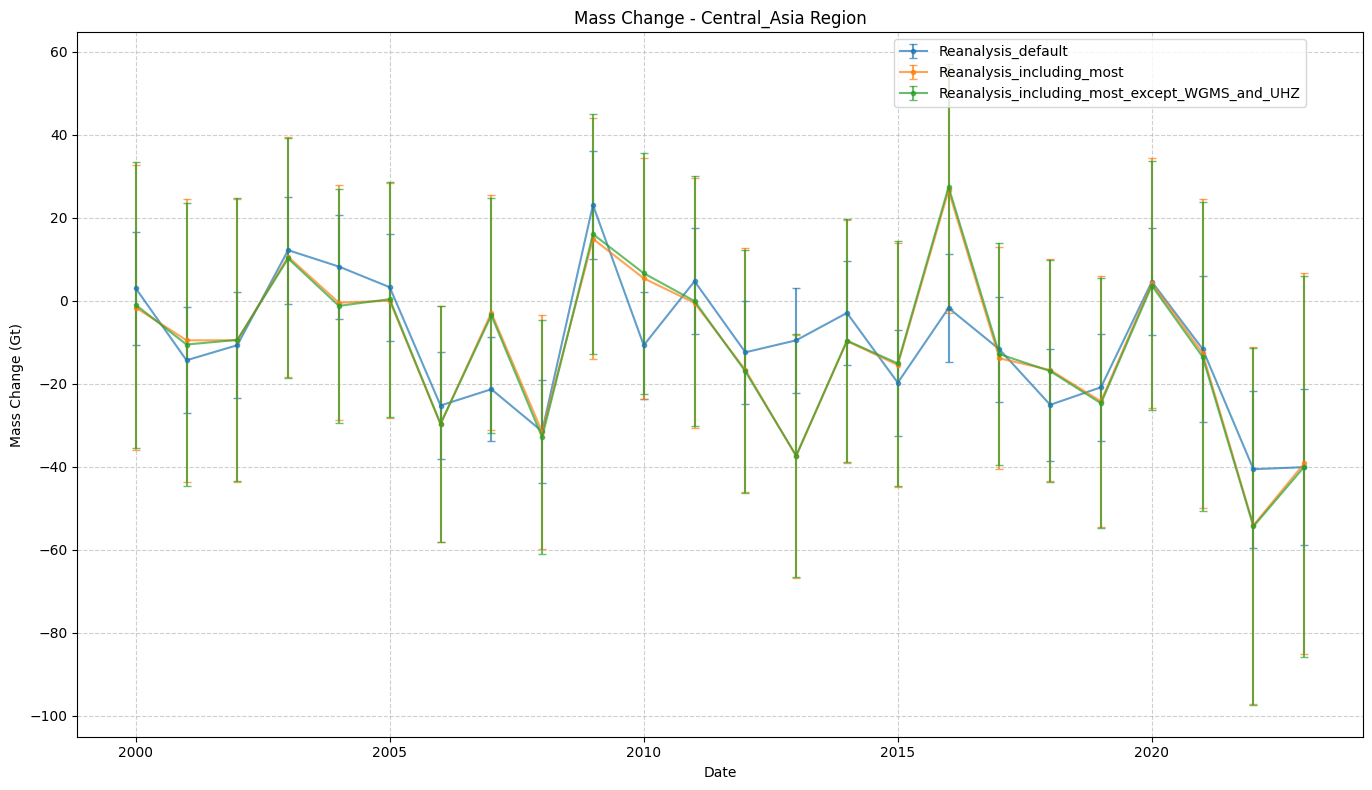

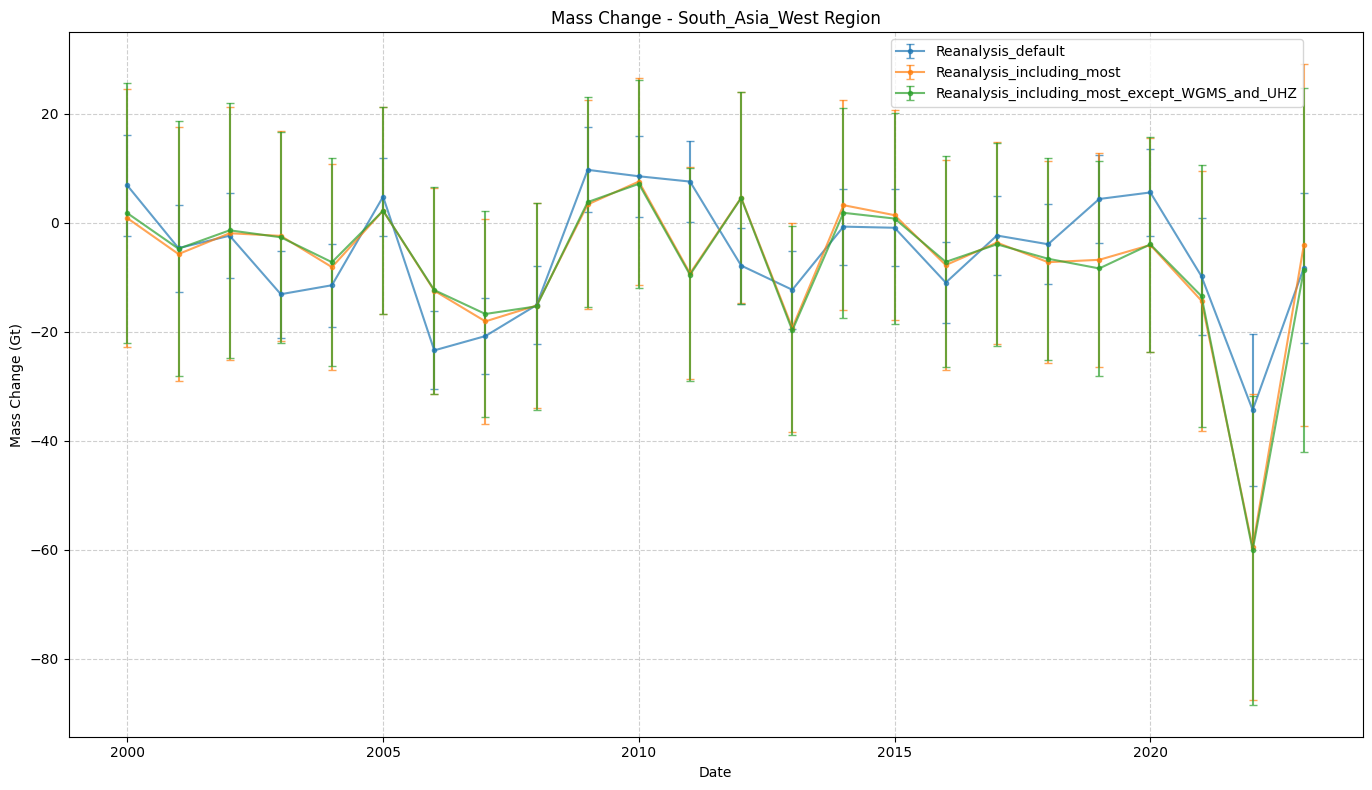

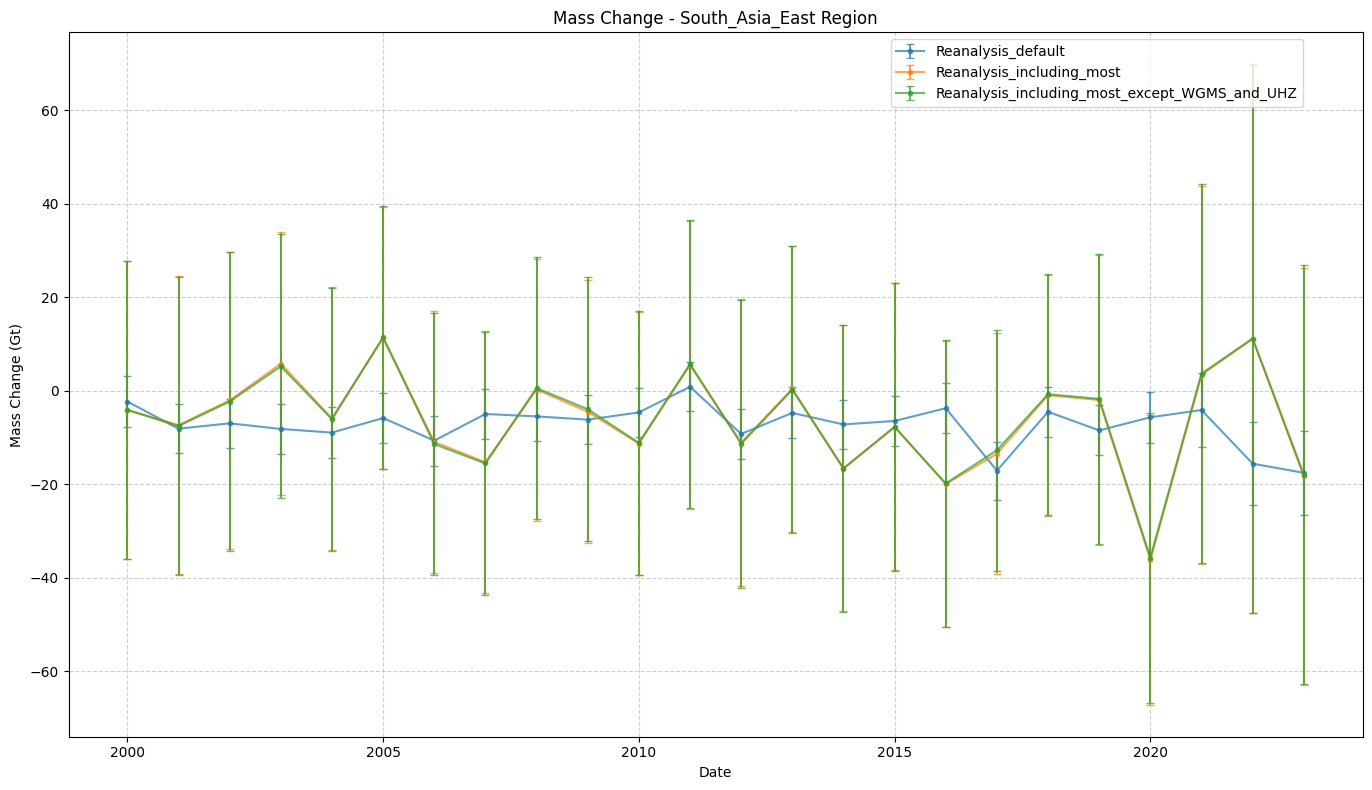

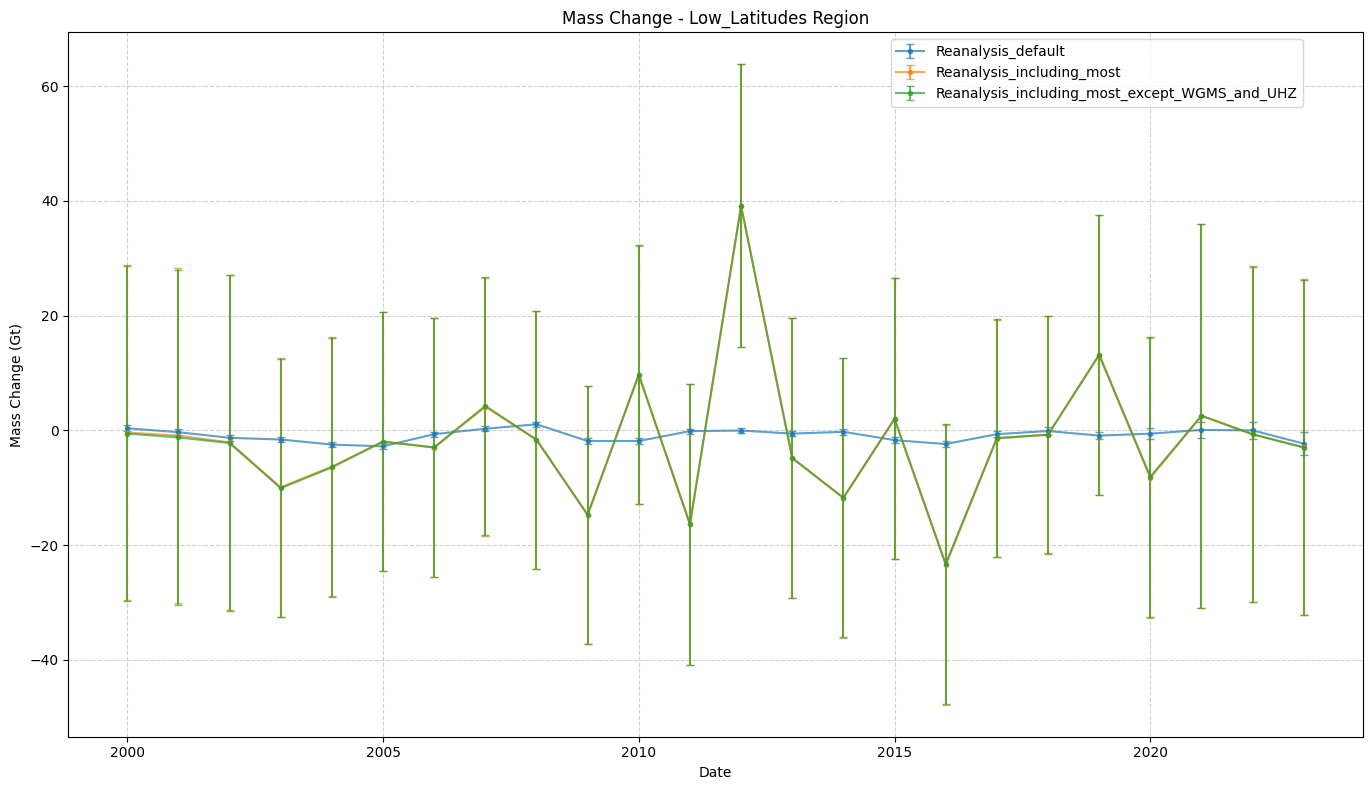

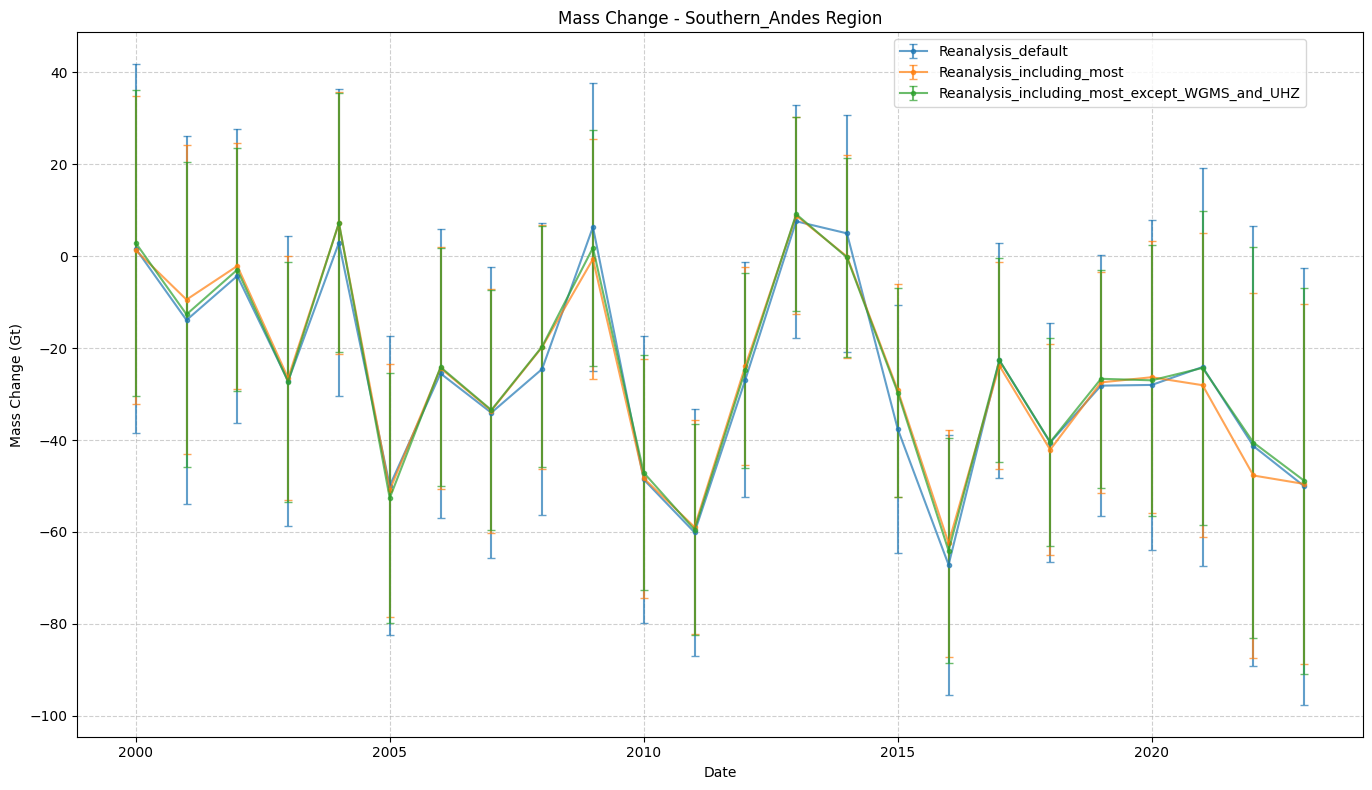

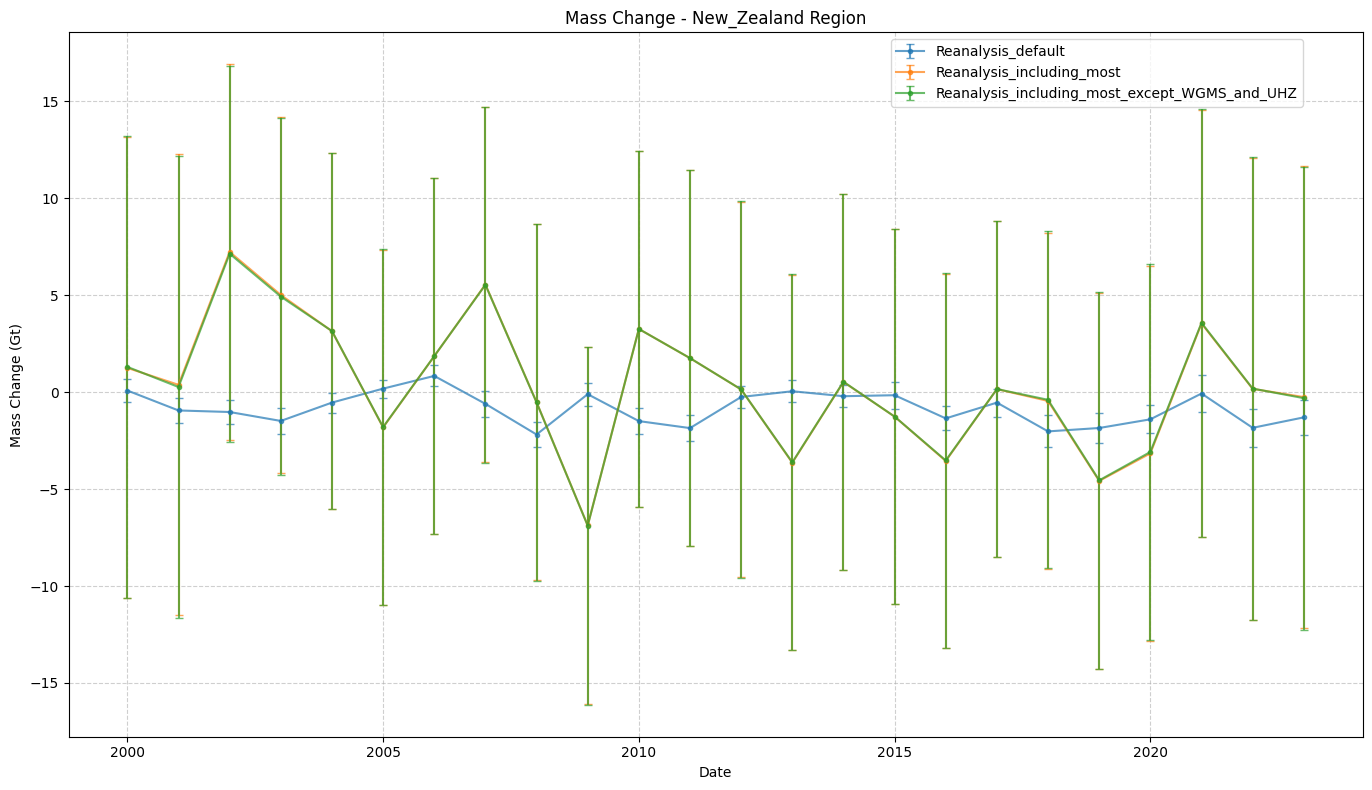

In [ ]:
from pathlib import Path
input_sensitivity = Path("input") / "sensitivity"

for i in range(1, 19):
    csv_files = sorted(input_sensitivity.glob(f"Reanalysis*/{i}_*/consensus/csvs/consensus_calendar_year_gt*.csv"))
    
    # Extract region name from the first match
    region_matches = list(input_sensitivity.glob(f"Reanalysis*/{i}_*"))
    region_name = 'Unknown'
    if region_matches:
        folder_name = region_matches[0].name
        region_name = folder_name.split('_', 1)[1] if '_' in folder_name else folder_name
    
    plt.figure(figsize=(14, 8))

    for csv_file in csv_files:
        df = pd.read_csv(str(csv_file))
        
        date_col = next((c for c in df.columns if 'date' in c.lower()), df.columns[0])
        change_col = next((c for c in df.columns if 'change' in c.lower()), None)
        error_col = next((c for c in df.columns if 'error' in c.lower()), None)
        
        if change_col and error_col:
            path_parts = csv_file.parts
            label = next((part for part in path_parts if part.startswith('Reanalysis')), 'Unknown')
            
            plt.errorbar(df[date_col], df[change_col], yerr=df[error_col], 
                        label=label, fmt='.-', capsize=3, alpha=0.7)


    # Use region name in title
    plt.title(f'Mass Change - {region_name.title()} Region')
    plt.xlabel('Date')
    plt.ylabel('Mass Change (Gt)')
    plt.legend(bbox_to_anchor=(0.63, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()